In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

**Main Question**: Does the number of hours a streamer spends streaming predict
the total number of followers gained on Twitch?
<br>
**Hypothesis**: Streamers who spend more hours streaming tend to gain more
followers due to increased visibility and audience engagement

In [2]:
df = pd.read_csv("twitchdata.csv")
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [3]:
df.tail()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English
999,Remx,122192850,99180,13788,1205,178553,59432,2049420,True,False,French


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Basic info about data:

Data has 1000 rows and 11 columns

most of the data is numeric (Watch Time, Stream Time, Peak Viewers, Average Viewers, Followers, Followers Gained, Views Gained)

With Categotical columns like Channel and Languages

And Booleen columns like Partnered, Mature

As per the data description - The time period of this data is 1 year (365 days)

In [5]:
df.isna().sum() 

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

The data has no na or missing values 

Initial inspection of the data revels that the column "Channel" has names in different languates with the translated name in brackets. For the sake of consistency lets keep all the names in English

We will also need consistent conlumn names 

And the time columns need to be in days instead of mins for better readability and understanding

Another thing to note is that this data is biased and does not capture the entire population correctly as these are only the "TOP" 1000 streamers, and streamers with lower stream times may not be captured in this data completely here. So if our model were to be trained on this data, it may not be able to predit correctly for all the values.

In [6]:
# Renaming Columns
df2 = df.rename(columns = {"Watch time(Minutes)": "Watch time (mins)", "Stream time(minutes)": "Stream time (mins)"})
df2.head()

,Channel,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [7]:
# Converting Stream Time in mins to days
df2['Watch time (days)'] = ((df2['Watch time (mins)']/60)/24).round().astype(int)
df2['Stream time (days)'] = ((df2['Stream time (mins)']/60)/24).round().astype(int)
df2.head()

,Channel,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Watch time (days),Stream time (days)
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,4302890,149
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,4230331,147
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,3919855,358
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,2757165,360
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,2549306,86


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Channel             1000 non-null   object
 1   Watch time (mins)   1000 non-null   int64 
 2   Stream time (mins)  1000 non-null   int64 
 3   Peak viewers        1000 non-null   int64 
 4   Average viewers     1000 non-null   int64 
 5   Followers           1000 non-null   int64 
 6   Followers gained    1000 non-null   int64 
 7   Views gained        1000 non-null   int64 
 8   Partnered           1000 non-null   bool  
 9   Mature              1000 non-null   bool  
 10  Language            1000 non-null   object
 11  Watch time (days)   1000 non-null   int64 
 12  Stream time (days)  1000 non-null   int64 
dtypes: bool(2), int64(9), object(2)
memory usage: 88.0+ KB


In [9]:
# Statistical Analysis of Numerical Columns
df2.describe().round().astype(int)

,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Watch time (days),Stream time (days)
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
mean,418427930,120515,37065,4781,570054,205519,11668166,290575,84
std,549635514,85376,60314,8454,804413,339914,24905722,381691,59
min,122192850,3465,496,235,3660,-15772,175788,84856,2
25%,163189894,73759,9114,1458,170546,43758,3880602,113327,51
50%,234990788,108240,16676,2425,318063,98352,6456324,163188,75
75%,433739918,141844,37570,4786,624332,236131,12196762,301208,98
max,6196161750,521445,639375,147643,8938903,3966525,670137548,4302890,362


There are some negative values for followers gained which might mean that those streams actually lost the that many followers.

### Making sense of the summary stats

We are interested in learning about hrs spent streaming and the followers

The mean streaming days is really, really low compared to expectations — 84 days. Assuming that a streamer spends 8 hours daily streaming, this corresponds to 252 days out of 365.

The minimum stream time is 2 days, and the maximum stream time is 362 days, which is less than the number of days in a year and therefore matches the given time period of data collection.

Interesting thing to check would be the distribution of streamers based on stream time (days) and Followers gained.  

Text(0.5, 1.0, 'Distribution of Stream time (days)')

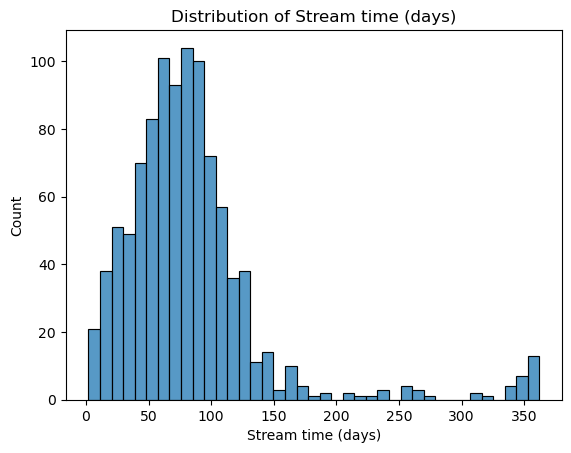

In [10]:
sns.histplot(data = df2, x = "Stream time (days)")
plt.title("Distribution of Stream time (days)")

Of the thousand top streamers, most of them have stream time between 2 days and  days, while low number of streamers have really high number of days.
This histplot shows that the data is right skewed.


Text(0.5, 1.0, 'Distribution of Followers gained')

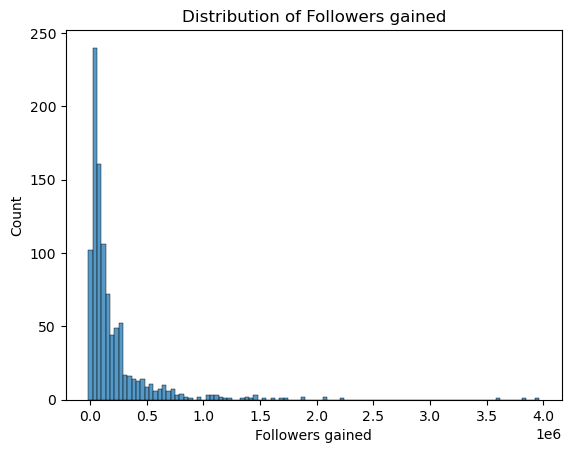

In [11]:
sns.histplot(data = df2, x = "Followers gained")
plt.title("Distribution of Followers gained")

Most of the streams gained between 0 to 50k follower, with some streamers gaining between 350k and 400k followers 

<Axes: xlabel='Stream time (days)'>

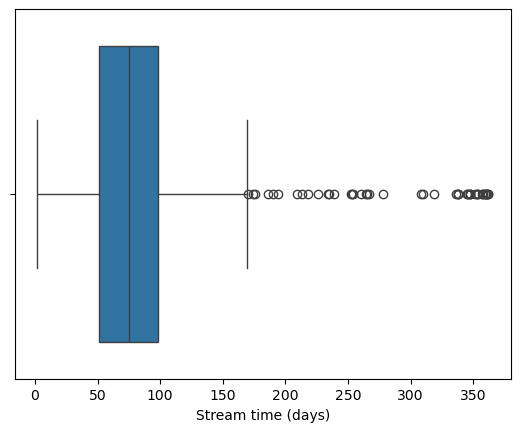

In [12]:
sns.boxplot(data = df2, x = "Stream time (days)")

<Axes: xlabel='Followers gained'>

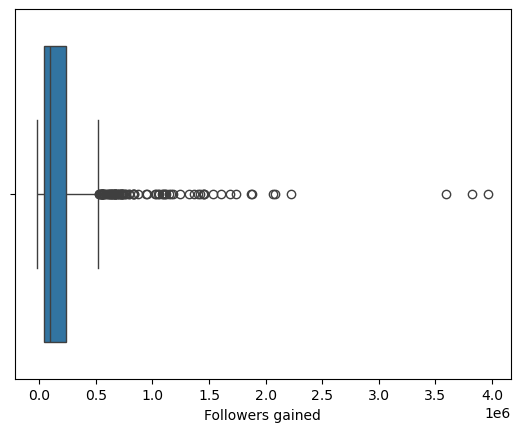

In [13]:
sns.boxplot(data = df2, x = "Followers gained")

Further investigating reveals potential outlier for both of these variables.

<Axes: xlabel='Stream time (days)', ylabel='Followers gained'>

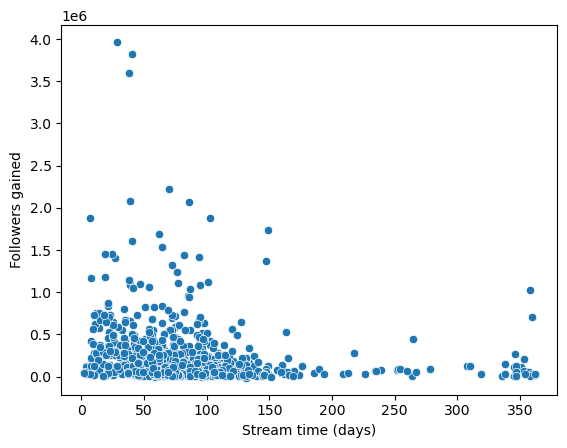

In [14]:
sns.scatterplot(data = df2, y="Followers gained", x="Stream time (days)")

This scatter plot was expected to show a linear relation between the two variables, that as stream time (days) increases so does the folloers gained. But that does not seem to happen here.
We have streamers  who streamed a lot but did not gain has many followers as expected and also those streamers which did not stream as much but still gained a lot of followers, these two types of streamers are less number but still skew the data
And finally most of the streamers which have average stream times but just less than average followers gained.
It is necessary to view this distribution again after removing the outliers and skewness in both the variables.

<Axes: xlabel='Followers', ylabel='Followers gained'>

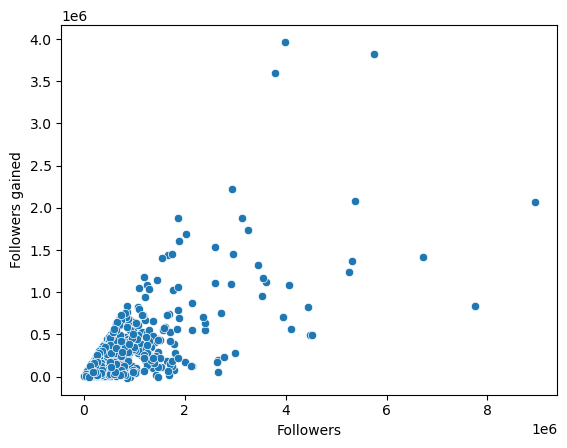

In [15]:
sns.scatterplot(data=df2, y="Followers gained", x="Followers")

<Axes: xlabel='Followers', ylabel='follower_gained_perc'>

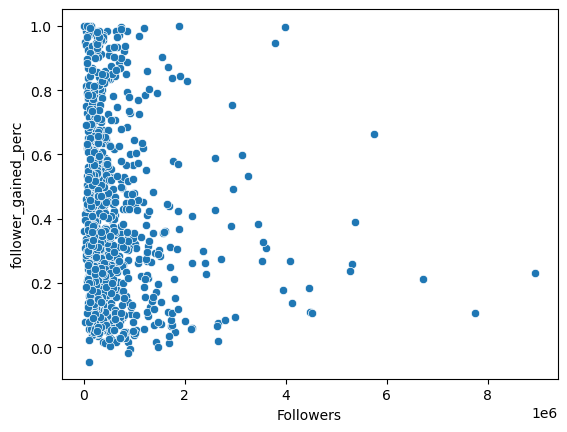

In [16]:
df2['follower_gained_perc'] = df2['Followers gained']/(df2['Followers'] + 1)
sns.scatterplot(data=df2, y="follower_gained_perc", x="Followers")

# df3 = df2[(df2['Followers'] > 1500000) & (df2['Stream time (days)'] < 200) ]
# sns.scatterplot(data=df3, y="follower_gained_perc", x="Stream time (days)")

# df3[(df3['follower_gained_perc']>0.9) & (df3['Stream time (days)'] < 20)]

In [17]:
Q1 = df2["Stream time (days)"].quantile(0.25)
Q3 = df2["Stream time (days)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df2[(df2["Stream time (days)"] >= lower_bound) & (df2["Stream time (days)"] <= upper_bound)]

In [18]:
Q1 = df_clean["Followers gained"].quantile(0.25)
Q3 = df_clean["Followers gained"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_clean[(df_clean["Followers gained"] >= lower_bound) & (df_clean["Followers gained"] <= upper_bound)]

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 867 entries, 7 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Channel               867 non-null    object 
 1   Watch time (mins)     867 non-null    int64  
 2   Stream time (mins)    867 non-null    int64  
 3   Peak viewers          867 non-null    int64  
 4   Average viewers       867 non-null    int64  
 5   Followers             867 non-null    int64  
 6   Followers gained      867 non-null    int64  
 7   Views gained          867 non-null    int64  
 8   Partnered             867 non-null    bool   
 9   Mature                867 non-null    bool   
 10  Language              867 non-null    object 
 11  Watch time (days)     867 non-null    int64  
 12  Stream time (days)    867 non-null    int64  
 13  follower_gained_perc  867 non-null    float64
dtypes: bool(2), float64(1), int64(9), object(2)
memory usage: 89.7+ KB


<Axes: xlabel='Followers', ylabel='follower_gained_perc'>

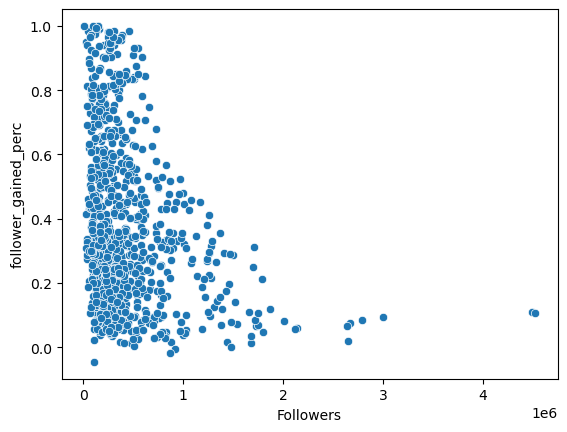

In [20]:
sns.scatterplot(data=df_cleaned, y="follower_gained_perc", x="Followers")


,Channel,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Watch time (days),Stream time (days),follower_gained_perc
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English,2292964,103,0.836191
45,Sardoche,1361024835,164235,144066,8066,746865,370358,32261961,True,True,French,945156,114,0.495883
48,HasanAbi,1339344945,193560,44649,6543,470123,340810,14154952,True,False,English,930101,134,0.724936
80,Trainwreckstv,1021699920,148425,49379,7134,728097,379973,12449595,True,True,English,709514,103,0.521871
95,EsfandTV,888938940,189045,29597,4393,471970,216021,24144005,True,False,English,617319,131,0.457700
114,TeePee,789698115,170010,78741,4410,520519,238257,17102146,True,True,English,548401,118,0.457729
115,LVNDMARK,788421150,199350,96236,3688,248829,244295,8815201,True,False,English,547515,138,0.981775
124,POW3Rtv,721548885,177885,69009,3836,1080764,495072,23271722,True,False,Italian,501076,124,0.458076
139,우왁굳 (woowakgood),650364705,158850,14177,4100,591500,207575,18626351,True,False,Korean,451642,110,0.350929
140,RATIRL,649761570,145050,14480,4420,423002,249048,14109245,True,True,English,451223,101,0.588762


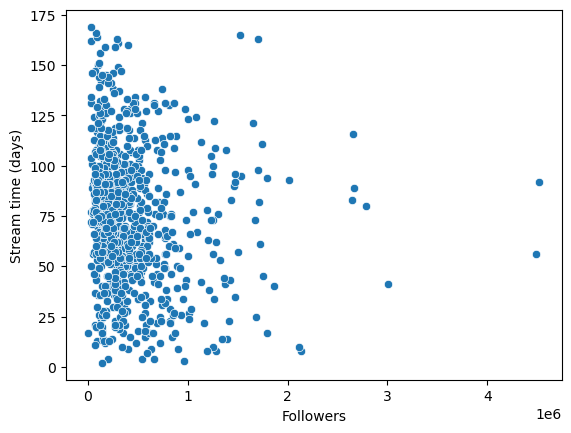

In [21]:
sns.scatterplot(data=df_cleaned, y="Stream time (days)", x="Followers")
df_cleaned[(df_cleaned["Stream time (days)"] > 100) & (df_cleaned["Followers gained"] > 200000)]

In [22]:
df_cleaned.describe()

,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Watch time (days),Stream time (days),follower_gained_perc
count,8.670000e+02,867.000000,867.000000,867.000000,8.670000e+02,867.000000,8.670000e+02,8.670000e+02,867.000000,867.000000
mean,3.393904e+08,107856.159170,30148.029988,4093.828143,4.276294e+05,129315.543253,1.010853e+07,2.356878e+05,74.913495,0.380277
std,3.349718e+08,47647.544995,50091.053562,7940.220762,4.413721e+05,117298.961346,2.497832e+07,2.326193e+05,33.084546,0.259018
min,1.221928e+08,3465.000000,2008.000000,529.000000,7.102000e+03,-15772.000000,1.757880e+05,8.485600e+04,2.000000,-0.045311
25%,1.596025e+08,76267.500000,8653.000000,1457.500000,1.656310e+05,40694.500000,3.747815e+06,1.108350e+05,53.000000,0.172732
50%,2.184154e+08,107715.000000,15242.000000,2286.000000,2.942770e+05,87860.000000,5.979126e+06,1.516770e+05,75.000000,0.326329
75%,3.762841e+08,138300.000000,29250.000000,4213.000000,5.249505e+05,181573.000000,1.044474e+07,2.613080e+05,96.000000,0.542863
max,3.301867e+09,243375.000000,639375.000000,147643.000000,4.520305e+06,532750.000000,6.701375e+08,2.292964e+06,169.000000,0.999790


Text(0, 0.5, 'Followers Gained %')

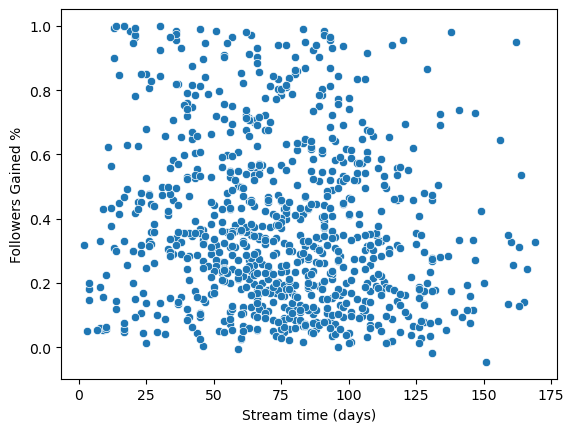

In [23]:
# df_cleaned['follower_gained_perc'] = df_cleaned['Followers gained']/(df_cleaned['Followers'] + 1)
# df3 = df_cleaned[(df_cleaned['Followers'] > 1500000) & (df_cleaned['Stream time (days)'] < 200) ]
# sns.scatterplot(data=df3, y="follower_gained_perc", x="Stream time (days)")
sns.scatterplot(data=df_cleaned, y="follower_gained_perc", x="Stream time (days)")
plt.ylabel("Followers Gained %")

In [24]:
df_clean_filtered = df_cleaned[['Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained', 'Watch time (days)', 'Stream time (days)', 'follower_gained_perc']]
column_names = ['Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained', 'Watch time (days)', 'Stream time (days)', 'follower_gained_perc']

correlation_matrix = df_clean_filtered.corr()
correlation_df = pd.DataFrame(correlation_matrix, index=column_names, columns=column_names)

print("Correlation Martrix: ")
correlation_df.round(2)

Correlation Martrix: 


,Peak viewers,Average viewers,Followers,Followers gained,Views gained,Watch time (days),Stream time (days),follower_gained_perc
Peak viewers,1.00,0.68,0.37,0.30,0.19,0.48,-0.27,0.05
Average viewers,0.68,1.00,0.25,0.19,0.17,0.42,-0.32,-0.06
Followers,0.37,0.25,1.00,0.48,0.13,0.46,-0.13,-0.29
Followers gained,0.30,0.19,0.48,1.00,0.15,0.31,-0.25,0.45
Views gained,0.19,0.17,0.13,0.15,1.00,0.50,0.03,0.03
Watch time (days),0.48,0.42,0.46,0.31,0.50,1.00,0.14,-0.10
Stream time (days),-0.27,-0.32,-0.13,-0.25,0.03,0.14,1.00,-0.15
follower_gained_perc,0.05,-0.06,-0.29,0.45,0.03,-0.10,-0.15,1.00


In [25]:
df_cleaned_filtered_right = df_cleaned[(df_cleaned["Stream time (days)"] > 86) | (df_cleaned["follower_gained_perc"] < 0.5)]
df_cleaned_filtered_left = df_cleaned[(df_cleaned["Stream time (days)"] < 86) & (df_cleaned["follower_gained_perc"] > 0.5)]

MSE model 1:  0.07
R-squared model 1:  0.02
RMSE model 1 0.27


MODEL 1 SUMMARY:                              Coef.  Std.Err.          t          P>|t|  \
Intercept                0.452824  0.014591  31.035043  1.434910e-148   
Q("Stream time (days)") -0.000634  0.000142  -4.454167   9.372870e-06   

                           [0.025    0.975]  
Intercept                0.424192  0.481456  
Q("Stream time (days)") -0.000913 -0.000355   

MSE model 2:  0.07
R-squared model 2:  0.02
RMSE model 2 0.26


MODEL 2 SUMMARY:                              Coef.  Std.Err.          t         P>|t|  \
Intercept                0.466425  0.021561  21.632712  2.714819e-83   
Q("Stream time (days)") -0.001150  0.000263  -4.367450  1.409324e-05   

                           [0.025    0.975]  
Intercept                0.424107  0.508743  
Q("Stream time (days)") -0.001667 -0.000633   

MSE model FR:  0.04
R-squared model FR:  0.02
RMSE model FR 0.2


MODEL R SUMMARY:                              Coef.  

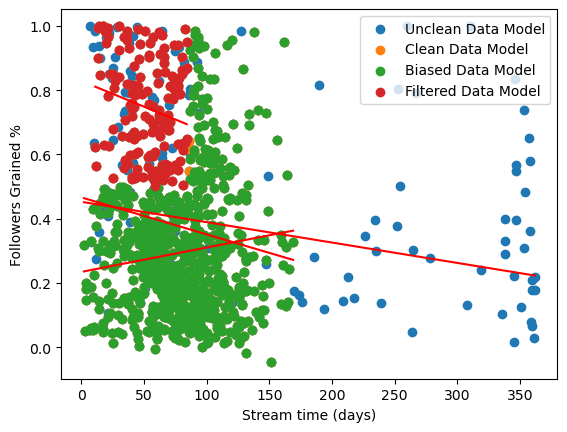

MSE (unclean data):  0.05
R-squared (unclean data):  0.38
RMSE (unclean data):  0.21
Average followers gained percentage:  0.4


MODEL 3 SUMMARY:                                  Coef.      Std.Err.          t          P>|t|  \
Intercept                4.374343e-01  1.392535e-02  31.412802  5.359936e-151   
Q("Average viewers")    -2.568368e-06  9.870772e-07  -2.601993   9.406235e-03   
Q("Followers")          -2.330665e-07  1.329657e-08 -17.528309   3.804633e-60   
Q("Followers gained")    6.761296e-07  2.922125e-08  23.138282   4.237594e-95   
Q("Watch time (days)")   9.524266e-09  2.547216e-08   0.373909   7.085518e-01   
Q("Stream time (days)") -4.090356e-04  1.270294e-04  -3.220006   1.323432e-03   

                               [0.025        0.975]  
Intercept                4.101078e-01  4.647607e-01  
Q("Average viewers")    -4.505362e-06 -6.313734e-07  
Q("Followers")          -2.591590e-07 -2.069739e-07  
Q("Followers gained")    6.187872e-07  7.334721e-07  
Q("Watch time (

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Single Variable Linear Regression

# y = variable being predicted = followers gained perc
# X = independent variable = Stream Time (days)

# On data with outliers 

model_1 = LinearRegression()

X = df2[['Stream time (days)']]
y = df2['follower_gained_perc']

model_1.fit(X, y)

y_pred_1 = model_1.predict(X)

plt.scatter(X, y, label='Unclean Data Model')
sns.lineplot(x = X.to_numpy().reshape(-1).tolist(), y = y_pred_1, color = "red")
plt.xlabel("Stream time (days)")
plt.ylabel("Followers Grained %")
print("MSE model 1: ", round(mean_squared_error(y, y_pred_1),2))
print("R-squared model 1: ", round(r2_score(y, y_pred_1),2))
print("RMSE model 1", round(np.sqrt(mean_squared_error(y, y_pred_1)),2))
print("\n")

formula = 'follower_gained_perc ~ Q("Stream time (days)")'
Model_1 = smf.ols(formula=formula, data=df2).fit()
summary = Model_1.summary2().tables[1]
print("MODEL 1 SUMMARY: ", summary, "\n")




# # On data without outliers

model_2 = LinearRegression()

X = df_cleaned[['Stream time (days)']]
y = df_cleaned['follower_gained_perc']

model_2.fit(X, y)

y_pred_2 = model_2.predict(X)

plt.scatter(X, y, label='Clean Data Model')
sns.lineplot(x = X.to_numpy().reshape(-1).tolist(), y = y_pred_2, color = "red")
plt.xlabel("Stream time (days)")
plt.ylabel("Followers Grained %")
print("MSE model 2: ", round(mean_squared_error(y, y_pred_2),2))
print("R-squared model 2: ", round(r2_score(y, y_pred_2),2))
print("RMSE model 2", round(np.sqrt(mean_squared_error(y, y_pred_2)),2))
print("\n")

Model_2 = smf.ols(formula=formula, data=df_cleaned).fit()
summary = Model_2.summary2().tables[1]
print("MODEL 2 SUMMARY: ", summary, "\n")




# # On clean and filtered data (RIGHT)

model_FR = LinearRegression()

X = df_cleaned_filtered_right[['Stream time (days)']]
y = df_cleaned_filtered_right['follower_gained_perc']

model_FR.fit(X, y)

y_pred_FR = model_FR.predict(X)

plt.scatter(X, y, label='Biased Data Model')
sns.lineplot(x = X.to_numpy().reshape(-1).tolist(), y = y_pred_FR, color = "red")
plt.xlabel("Stream time (days)")
plt.ylabel("Followers Grained %")
print("MSE model FR: ", round(mean_squared_error(y, y_pred_FR),2))
print("R-squared model FR: ", round(r2_score(y, y_pred_FR),2))
print("RMSE model FR", round(np.sqrt(mean_squared_error(y, y_pred_FR)),2))
print("\n")


Model_R = smf.ols(formula=formula, data=df_cleaned_filtered_right).fit()
summary = Model_R.summary2().tables[1]
print("MODEL R SUMMARY: ", summary, "\n")





# # On clean and filtered data (LEFT)

model_FL = LinearRegression()

X = df_cleaned_filtered_left[['Stream time (days)']]
y = df_cleaned_filtered_left['follower_gained_perc']

model_FL.fit(X, y)

y_pred_FL = model_FL.predict(X)

plt.scatter(X, y, label='Filtered Data Model')
sns.lineplot(x = X.to_numpy().reshape(-1).tolist(), y = y_pred_FL, color = "red")
plt.xlabel("Stream time (days)")
plt.ylabel("Followers Grained %")
print("MSE model FL: ", round(mean_squared_error(y, y_pred_FL),2))
print("R-squared model FL: ", round(r2_score(y, y_pred_FL),2))
print("RMSE model FL", round(np.sqrt(mean_squared_error(y, y_pred_FL)),2))
print("\n")

Model_L = smf.ols(formula=formula, data=df_cleaned_filtered_left).fit()
summary = Model_L.summary2().tables[1]
print("MODEL L SUMMARY: ", summary, "\n")

plt.legend()
plt.show()

# plt.savefig("my_plot.png", dpi=300)









# Multivariable Linear Regression

# y = variable being predicted = followers gained perc  
# X = independent variable = Averge viewers, Followers, Followers gained, Watch time (days), Stream Time (days) 

# On data with outliers

model_3 = LinearRegression()

X = df2[['Average viewers', 'Followers', 'Followers gained', 'Watch time (days)', 'Stream time (days)']]
y = df2['follower_gained_perc']

model_3.fit(X, y)

y_pred_3 = model_3.predict(X)

print("MSE (unclean data): ", round(mean_squared_error(y, y_pred_3),2))
print("R-squared (unclean data): ", round(r2_score(y, y_pred_3),2))
print("RMSE (unclean data): ", round(np.sqrt(mean_squared_error(y, y_pred_3)),2))
print("Average followers gained percentage: ", np.round(np.average(df2['follower_gained_perc']),2))

print("\n")

formula_multi = 'follower_gained_perc ~ Q("Average viewers") + Q("Followers") + Q("Followers gained") + Q("Watch time (days)") + Q("Stream time (days)")'

Model_3 = smf.ols(formula=formula_multi, data=df2).fit()
summary = Model_3.summary2().tables[1]
print("MODEL 3 SUMMARY: ", summary, "\n")



# On data without outliers

model_4 = LinearRegression()

X = df_cleaned[['Average viewers', 'Followers', 'Followers gained', 'Watch time (days)', 'Stream time (days)']]
y = df_cleaned['follower_gained_perc']

model_4.fit(X, y)

y_pred_4 = model_4.predict(X)

print("MSE (clean data): ", round(mean_squared_error(y, y_pred_4),2))
print("R-squared (clean data): ", round(r2_score(y, y_pred_4),2))
print("RMSE (clean data): ", round(np.sqrt(mean_squared_error(y, y_pred_4)),2))
print("Average followers gained percentage (clean data): ", np.round(np.average(df_cleaned['follower_gained_perc']),2))

print("\n")

Model_4 = smf.ols(formula=formula_multi, data=df_cleaned).fit()
summary = Model_4.summary2().tables[1]
print("MODEL 4 SUMMARY: ", summary, "\n")





# On clean and filtered data (RIGHT)

model_FR = LinearRegression()

X = df_cleaned_filtered_right[['Average viewers', 'Followers', 'Followers gained', 'Watch time (days)', 'Stream time (days)']]
y = df_cleaned_filtered_right['follower_gained_perc']

model_FR.fit(X, y)

y_pred_FR = model_FR.predict(X)

print("MSE (FR): ", round(mean_squared_error(y, y_pred_FR),2))
print("R-squared (FR): ", round(r2_score(y, y_pred_FR),2))
print("RMSE (FR): ", round(np.sqrt(mean_squared_error(y, y_pred_FR)),2))
print("Average followers gained percentage (FR): ", np.round(np.average(df_cleaned_filtered_right['follower_gained_perc']),2))

print("\n")

Model_MR = smf.ols(formula=formula_multi, data=df_cleaned_filtered_right).fit()
summary = Model_MR.summary2().tables[1]
print("MODEL MR SUMMARY: ", summary, "\n")




# On clean and filtered data (LEFT)

model_FL = LinearRegression()

X = df_cleaned_filtered_left[['Average viewers', 'Followers', 'Followers gained', 'Watch time (days)', 'Stream time (days)']]
y = df_cleaned_filtered_left['follower_gained_perc']


model_FL.fit(X, y)

y_pred_FL = model_FL.predict(X)

print("MSE (FL): ", round(mean_squared_error(y, y_pred_FL),2))
print("R-squared (FL): ", round(r2_score(y, y_pred_FL),2))
print("RMSE (FL): ", round(np.sqrt(mean_squared_error(y, y_pred_FL)),2))
print("Average followers gained percentage (FL): ", np.round(np.average(df_cleaned_filtered_left['follower_gained_perc']),2))

print("\n")

Model_ML = smf.ols(formula=formula_multi, data=df_cleaned_filtered_left).fit()
summary = Model_ML.summary2().tables[1]
print("MODEL MR SUMMARY: ", summary, "\n")

In [27]:

avg_viewers = 10000
followers = 50000
followers_gained = 1000
watch_time_days = 100

streamdays = [10, 20, 50, 100, 250, 365]

for streamday in streamdays:
    X_input = [[avg_viewers, followers, followers_gained, watch_time_days, streamday]]
    
    pred_3 = model_3.predict(X_input)[0]
    pred_4 = model_4.predict(X_input)[0]
    pred_FR = model_FR.predict(X_input)[0]
    pred_FL = model_FL.predict(X_input)[0]
    
    print(f"Stream days = {streamday} | model_3: {pred_3:.2f}, model_4: {pred_4:.2f}, model_FR: {pred_FR:.2f}, model_FL: {pred_FL:.2f}")

Stream days = 10 | model_3: 0.40, model_4: 0.33, model_FR: 0.20, model_FL: 0.71
Stream days = 20 | model_3: 0.39, model_4: 0.32, model_FR: 0.21, model_FL: 0.70
Stream days = 50 | model_3: 0.38, model_4: 0.31, model_FR: 0.24, model_FL: 0.68
Stream days = 100 | model_3: 0.36, model_4: 0.29, model_FR: 0.28, model_FL: 0.64
Stream days = 250 | model_3: 0.30, model_4: 0.22, model_FR: 0.40, model_FL: 0.54
Stream days = 365 | model_3: 0.25, model_4: 0.17, model_FR: 0.49, model_FL: 0.46
